In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics

In [2]:
data = pd.read_csv('employees_attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
y = data['Attrition']
x = data.drop(['Attrition'], axis=1)

In [5]:
x.shape

(1470, 34)

In [6]:
y.shape

(1470,)

In [7]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
x_dummies = pd.get_dummies(x)
x_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [9]:
x_dummies.shape

(1470, 55)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Default criterion is gini indicating gini impurity.
# Use 'energy' if you want to use information gain for the split

clf = DecisionTreeClassifier()
#clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Also called as Hyper parameter tuning

- Pruning helps us to avoid overfitting
    - Generally it is preferred to have a simple model, it avoids overfitting issue
    - Any additional split that does not add significant value is not worth while.
- We can avoid overfitting by changing the pruning parameters like
    - **max_leaf_nodes:**
        - indicates the maximum number of leaf nodes a tree can have.
        - Allows to reduce the number of leaf nodes and hence pruning the tree
    - **min_samples_leaf:**
        - indicates the minimum number of samples required to be at a leaf node. A split point at any depth will only by considered if it leaves at min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model. The default value is 1.
        - For pruning, restrict the size of sample leaf
        - Minimum samples size in terminal nodes can be fixed to 30,100, 300 or 5% of total.
    - **max_depth:**
        - indicates the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        - For pruning, reduce the depth of the tree to build a generalized tree. 
        - Set the depth of the tree to 3,5,10 depending after verification on test data.

In [12]:
y_predict = clf.predict(x_test)

In [13]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [14]:
cm = confusion_matrix(y_test,y_predict)

In [15]:
cm

array([[325,  46],
       [ 46,  24]], dtype=int64)

In [16]:
#accuracy
score = clf.score(x_test,y_test)*100
score

79.13832199546485

In [17]:
probs = clf.predict_proba(x_test)

In [18]:
from sklearn import metrics
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.609433962264151


# Drawing Tree

In [19]:
cols = list(x_dummies.columns.values)
from sklearn import tree

In [20]:
import matplotlib.pyplot as plt

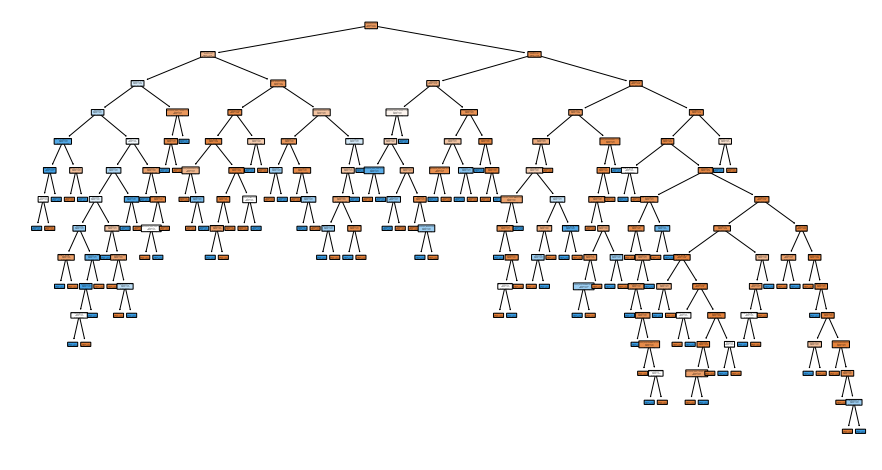

In [21]:
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_train,y_train), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)

plt.show()

# overfitted model:

- performs well on training set.
- fails to perform on test

# underfit:

- Fails to perform on both training & testing

To overcome underfit, increase the sample size.

In [124]:
# The parameter splitter indicates the strategy used to choose the split at each node. 
# Supported strategies are "best" to choose the best split and 'random' to choose the best random split.
# splitter = 'random'

dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 9, 
                             max_depth=7)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

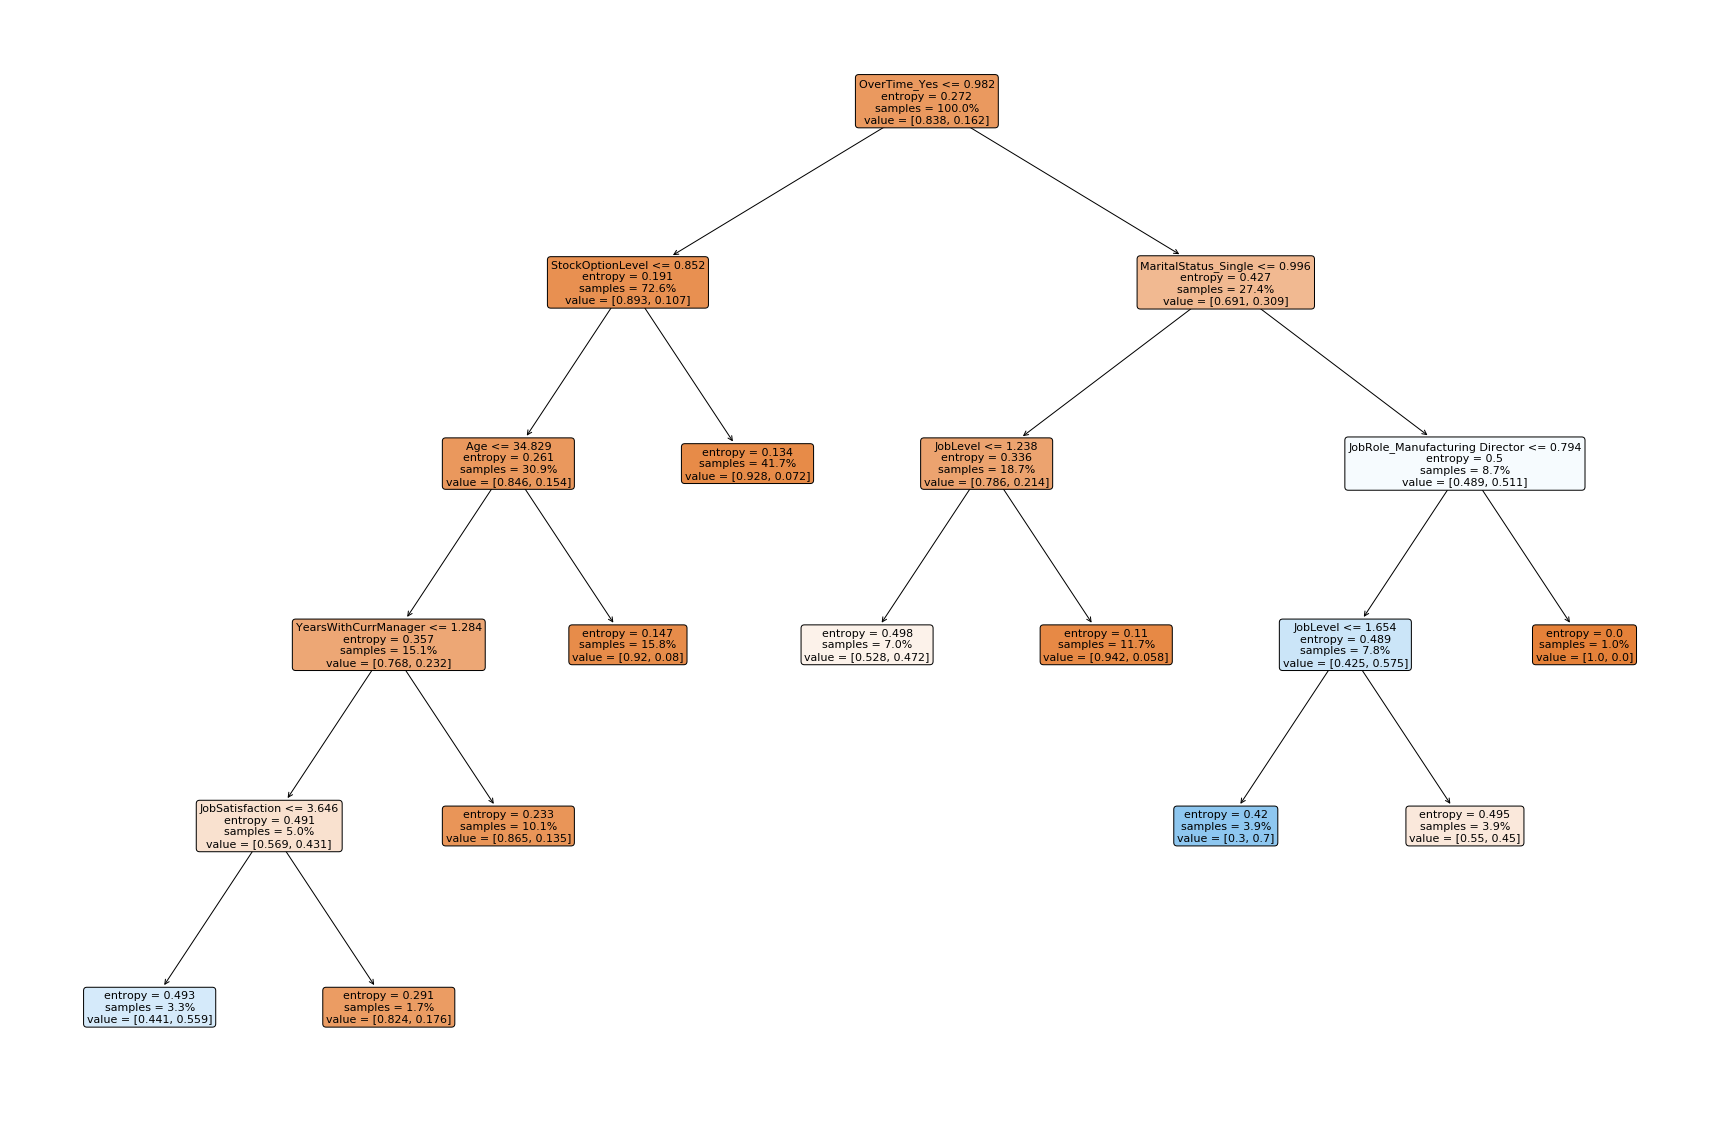

In [125]:
plt.figure(figsize = (30,20))

tree.plot_tree(dtc.fit(x_train, y_train), feature_names = cols, filled = True, precision=3, proportion = True,
              rounded = True)
plt.show()

In [126]:
len(data)

1470

In [127]:
y_pred = dtc.predict(x_test)

In [128]:
accuracy = metrics.accuracy_score(y_pred, y_test)*100
accuracy

84.80725623582767